# Lecture 5

## Q 5.1

### Question

Calculate all prime numbers under 500, using the following algorithmn:

- Eratothenes' sieve
- Trial division
- Fermat's little theorem -> Euler's criterion
- Probabilistic primality test

Discuss the efficiency of each algorithmn.

### Solution

#### Eratothenes' sieve

In [2]:
tic
N=500;
x=2:N;

for i=2:N-1
    % remove i*2 i*3 ... in x
    j=2;
    while j*i <= N
        x(j*i-1) = 0;
        j=j+1;
    end
end

x = x(x~=0);
disp(num2str(x));
toc
clear all;

2    3    5    7   11   13   17   19   23   29   31   37   41   43   47   53   59   61   67   71   73   79   83   89   97  101  103  107  109  113  127  131  137  139  149  151  157  163  167  173  179  181  191  193  197  199  211  223  227  229  233  239  241  251  257  263  269  271  277  281  283  293  307  311  313  317  331  337  347  349  353  359  367  373  379  383  389  397  401  409  419  421  431  433  439  443  449  457  461  463  467  479  487  491  499
Elapsed time is 0.041646 seconds.


#### Trial division

In [36]:
tic
N=500;
x=2:N;

for i=2:N
    % determine if i is prime using [2:i-1], set x(i-1) to 0 if not
    for j=2:1:floor(sqrt(i))
        if mod(i,j) == 0
            x(i-1) = 0;
            break;
        end
    end
end

x = x(x~=0);
disp(num2str(x));
toc
clear all;

2    3    5    7   11   13   17   19   23   29   31   37   41   43   47   53   59   61   67   71   73   79   83   89   97  101  103  107  109  113  127  131  137  139  149  151  157  163  167  173  179  181  191  193  197  199  211  223  227  229  233  239  241  251  257  263  269  271  277  281  283  293  307  311  313  317  331  337  347  349  353  359  367  373  379  383  389  397  401  409  419  421  431  433  439  443  449  457  461  463  467  479  487  491  499
Elapsed time is 0.040362 seconds.


#### Fermat's little theorem -> Euler's criterion

In [37]:
tic
N=500;
x=2:N;

for n=3:N
    if mod(n,2) == 0
        x(n-1) = 0;
        continue;
    end

    a=1;
    while a<70*log(n)^2
        if mod(sym(a)^((n-1)/2) - jacobiSymbol(a,n),n) == 0
            a=a+1;
        else
            x(n-1) = 0;
            break;
        end
    end
end

x = x(x~=0);
disp(num2str(x));
toc
clear all;

Failed to execute. Operation may have interrupted by user.

> Due to timeout limits in jupyter notebook, the above code is runned in `Q_5_3.m` and here are the results:

> ```
> 2    3    5    7   11   13   17   19   23   29   31   37   41   43   47   53   59   61   67   71   73   79   83   89   97  101  103  107  109  113  127  131  137  139  149  151  157  163  167  173  179  181  191  193  197  199  211  223  227  229  233  239  241  251  257  263  269  271  277  281  283  293  307  311  313  317  331  337  347  349  353  359  367  373  379  383  389  397  401  409  419  421  431  433  439  443  449  457  461  463  467  479  487  491  499
> Elapsed time is 341.076231 seconds.
> ```

#### Probabilistic primality test

In [1]:
tic
N=500;
x=2:N;
k=100;
s=rng();

for n=3:N
    for i=1:k
        % pick random a
        a = randi([2,n-1],1,1);

        % if n mod a == 0, n is not prime
        if mod(n,a) == 0
            x(n-1) = 0;
            break;
        end

        % calc J=a^(n-1)/2 mod n
        J = mod(sym(a)^((n-1)/2),n);

        % if j!=+-1, n is not prime
        if J ~= 1 && J ~= n-1
            x(n-1) = 0;
            break;
        end
    end
end

x = x(x~=0);
disp(num2str(x));
toc
clear all;

2    3    5    7   11   13   17   19   23   29   31   37   41   43   47   53   59   61   67   71   73   79   83   89   97  101  103  107  109  113  127  131  137  139  149  151  157  163  167  173  179  181  191  193  197  199  211  223  227  229  233  239  241  251  257  263  269  271  277  281  283  293  307  311  313  317  331  337  347  349  353  359  367  373  379  383  389  397  401  409  419  421  431  433  439  443  449  457  461  463  467  479  487  491  499
Elapsed time is 13.656130 seconds.


## Q 5.2
### Question

#### Task 1

Draw all prime numbers on $\mathbb{R}$, visualize the distribution of prime numbers.

#### Task 2

Use $\pi(x)$ to denote the number of prime numbers less than $x$, and $\pi(m,n)$ to denote the number of prime numbers between $m$ and $n$.

Calculate $\pi(10^k)$ for $k=2,3,4$, also $\pi(100,200), \pi(1000,1100), \pi(10000,10100)$. Based on the result, is prime number getting denser or sparser?

### Solution

#### Task 1

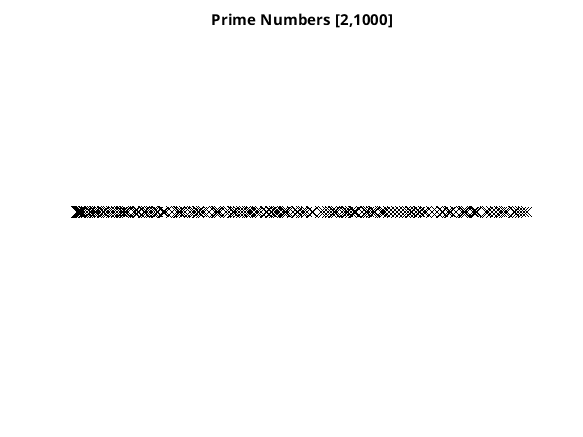

In [15]:
N=1000;
x=2:N;

for i=2:N
    for j=2:1:floor(sqrt(i))
        if mod(i,j) == 0
            x(i-1) = 0;
            break;
        end
    end
end
x = x(x~=0);

h1=figure(1);clf
hold on
xlim([0, N]);ylim([-1,1])
plot(x,0,'kx','markersize',10)
axis off
title('Prime Numbers [2,1000]')
clear all;

#### Task 2

In [19]:
N=10100;
x=2:N;

for i=2:N
    for j=2:1:floor(sqrt(i))
        if mod(i,j) == 0
            x(i-1) = 0;
            break;
        end
    end
end
x = x(x~=0);

pi_100 = length(x(x<=100));
fprintf('pi(100) = %d\n',pi_100);
pi_1000 = length(x(x<=1000));
fprintf('pi(1000) = %d\n',pi_1000);
pi_10000 = length(x(x<=10000));
fprintf('pi(10000) = %d\n',pi_10000);

pi_100_200 = length(x(x<=200)) - length(x(x<=100));
fprintf('pi(200) - pi(100) = %d\n',pi_100_200);
pi_1000_1100 = length(x(x<=1100)) - length(x(x<=1000));
fprintf('pi(1100) - pi(1000) = %d\n',pi_1000_1100);
pi_10000_10100 = length(x(x<=10100)) - length(x(x<=10000));
fprintf('pi(10100) - pi(10000) = %d\n',pi_10000_10100);

pi(100) = 25
pi(1000) = 168
pi(10000) = 1229
pi(200) - pi(100) = 21
pi(1100) - pi(1000) = 16
pi(10100) - pi(10000) = 11


So it's getting sparser.